# Multiclass classification with Keras
- single perceptron with sigmoid was good for binary classification, not applicable for multiclass
- multiple perceptrons with softmax is used for multiclass 
- https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax
- https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d
- softmax assigns a probability that a given data vector belongs to a given class (sort of like naive bayes)
- uses categorical cross entropy https://gombru.github.io/2018/05/23/cross_entropy_loss/

### Imports
- Sequential allows for the creation of a model layer by laer
- Dense creates fully connected layers
- Adam optimizer is an extension to stochastic gradient descent in that it computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradient
- https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
- to_categorical one hot encodes categorical features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


### Functions
- **plotDecisionBoundary** creates a contour plot to easily visualize the decision boundary of the classifier
- uses model.predict_classes, instead of model.predict

In [2]:
def plotDecisionBoundary(X,y, mdl):
    xSpan = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
    ySpan = np.linspace(min(X[:,1])-1, max(X[:,0])+1)
    xx,yy = np.meshgrid(xSpan, ySpan)
    _xx,_yy = xx.ravel(), yy.ravel()
    grid = np.c_[_xx,_yy]
    pred = model.predict_classes(grid)
    z = pred.reshape(xx.shape)
    plt.contourf(xx,yy,z)

### Generate random data samples
- create 3 classes and the dataset
- make_blobs for multiclass classification 
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [3]:
numPoints = 500
clusterCenters = [[-.7, 0.1],
                  [1.4, .9],
                  [1.2, -1.2]]
X, _y = datasets.make_blobs(n_samples=numPoints, random_state=31, centers=clusterCenters, cluster_std=.5)

### Plot the dataset
- display the three classes

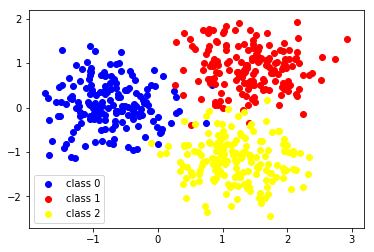

In [4]:
plt.scatter(X[_y==0,0], X[_y==0,1], color='blue')
plt.scatter(X[_y==1,0], X[_y==1,1], color='red')
plt.scatter(X[_y==2,0], X[_y==2,1], color='yellow')
plt.legend(["class 0", "class 1", "class 2"])
plt.show()

### Encode the labels
- https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding
- example of some labels before and after encoding [7:13] is just arbitrary

In [5]:
print(_y[7:13]) #labels before

[0 2 1 1 1 0]


In [6]:
y = to_categorical(_y,3)
print(y[7:13]) #labels after

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


### Define the model
- single layer multiperceptron
- 2 inputs (x and y coordinates)
- 3 outputs (number of outputs = number of classes)
- each output is the probability of that class

In [7]:
model = Sequential(0)
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.3), loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the model

In [8]:
hist = model.fit(x=X, y=y, verbose=0, batch_size=50, epochs=200)

### Visualize the model performance
- returns a history object, which is used to plot the model performance

dict_keys(['loss', 'acc'])


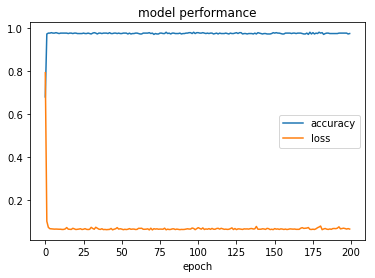

In [9]:
print(hist.history.keys())
plt.plot(hist.history['acc'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.title("model performance")
plt.xlabel("epoch")
plt.legend()
plt.show()

### Make predictions
- in a real scenario you would use a test set
- here points are created on purpose 

In [12]:
class0 = np.array([[0.1, -.1]])
pred0 = model.predict_classes(class0)
class1 = np.array([[1.1, 0.0]])
pred1 = model.predict_classes(class1)
class2 = np.array([[.72, -0.53]])
pred2 = model.predict_classes(class2)
print(pred0)
print(pred1)
print(pred2)

[0]
[1]
[2]


### Plot decision boundary
- uses contourf function 
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html
- visualize the decision gradient

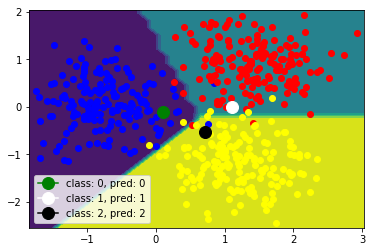

In [13]:
plotDecisionBoundary(X,y,model)
plt.scatter(X[_y==0,0], X[_y==0,1], color='blue')
plt.scatter(X[_y==1,0], X[_y==1,1], color='red')
plt.scatter(X[_y==2,0], X[_y==2,1], color='yellow')
axes = plt.gca()
axes.set_ylim([X[:,1].min()-.1,X[:,1].max()+.1])
axes.set_xlim([X[:,0].min()-.1,X[:,0].max()+.1])
plt.plot(class0[0,0], class0[0,1], marker="o", markersize=12, color='green', label="class: 0, pred: %d" % pred0)
plt.plot(class1[0,0], class1[0,1], marker="o", markersize=12, color='white', label="class: 1, pred: %d" % pred1)
plt.plot(class2[0,0], class2[0,1], marker="o", markersize=12, color='black', label="class: 2, pred: %d" %pred2)
plt.legend()